In [ ]:
# -----********************-----

# Created Time: 2024/12/13

# Last updated: 2024/12/13

# Author: Yiyi He

### Use Case

# This notebook add new variables into the dataframe
# 1. 

# -----********************-----

# Libraries

In [8]:
# Import libraries
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Add forest cover(%)

In [17]:
# Load input dataframes
df_518 = pd.read_csv("/Users/yiyi/Desktop/df_for_model.csv")
station_50km_forest_perc = pd.read_csv('/Users/yiyi/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Research/Energy_resilience/01_data/2024_9_10_Tingyu/processed/station_utm_50km_forest_perc.csv')

# Add forest percentage in 50km buffer zone
df_518_50km_forest_perc = pd.merge(df_518,
                                   station_50km_forest_perc[['station_id', 'forest_per']],
                                   on='station_id',
                                   how='left')
# Rename column
df_518_50km_forest_perc.rename(columns={"forest_per": "forest_perc_50kmbuffer"},
                               inplace=True)

# Load dataframe containing forest cover at district level in India
station_district_forest_perc_df = pd.read_csv('/Users/yiyi/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Research/Energy_resilience/01_data/2024_9_10_Tingyu/processed/station_district_forest_perc.csv')
# Merge district forest percentage
df_518_forest_perc = pd.merge(df_518_50km_forest_perc, station_district_forest_perc_df[['station_id', 'forest_per']],
                              on='station_id',
                              how='left')
# Rename new column
df_518_forest_perc.rename(columns={"forest_per": "forest_perc_district"},
                          inplace=True)
df_518_forest_perc.to_csv('/Users/yiyi/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Research/Energy_resilience/01_data/2024_9_10_Tingyu/processed/station_518_forest_perc_50kmBu_district_df.csv')

## Forest percentage 50km buffer v.s. India districts

In [9]:
# Load forest cover dataframe [OPTIONAL]
df_518_forest_perc = pd.read_csv('/Users/yiyi/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Research/Energy_resilience/01_data/2024_9_10_Tingyu/processed/station_518_forest_perc_50kmBu_district_df.csv',
                                 index_col=0)

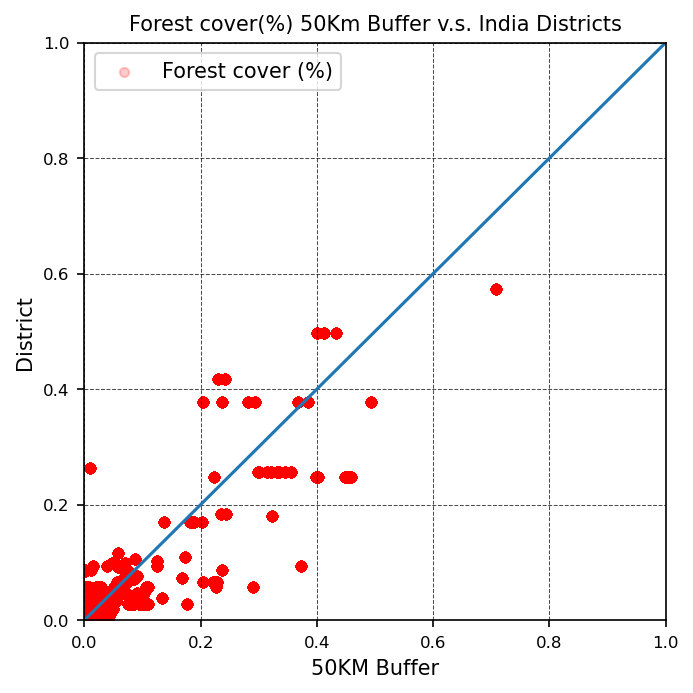

In [7]:
# Plot new forest cover
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
ax.set_facecolor('xkcd:white')
plt.scatter(df_518_forest_perc.forest_perc_50kmbuffer,
            df_518_forest_perc.forest_perc_district,
            label = 'Forest cover (%)',
            marker = 'o',
            s = 20,
            alpha=0.2,
            color = 'red')
ax.axline((0, 0), slope=1)
plt.xlabel('50KM Buffer',fontsize=10)
plt.ylabel('District',fontsize=10)
plt.title('Forest cover(%) 50Km Buffer v.s. India Districts',fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(fontsize=10)
plt.grid(True, color = 'k', linewidth = 0.5, linestyle = '--',alpha=0.7)
plt.xticks(fontsize=8, fontweight='light')
plt.yticks(fontsize=8, fontweight='light')
plt.show()

# Calculate forest-wind interaction term

In [12]:
# Load forest cover dataframe [OPTIONAL]
df_518_forest_perc = pd.read_csv('/Users/yiyi/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Research/Energy_resilience/01_data/2024_9_10_Tingyu/processed/station_518_forest_perc_50kmBu_district_df.csv',
                                 index_col=0)
df_518_forest_perc.head(3)

# Add wind forest interaction terms as new columns
# 50 km buffer
df_518_forest_perc['wind_forest_cover_50kmbu'] = df_518_forest_perc.wind_speed*df_518_forest_perc.forest_perc_50kmbuffer
# district
df_518_forest_perc['wind_forest_cover_district'] = df_518_forest_perc.wind_speed*df_518_forest_perc.forest_perc_district


,datetime,pct_blackout,wind_forest_cover,t2m,tp,wind_speed,station_id,climate_zone_code,forest_perc_50kmbuffer,forest_perc_district
0,2014-11-17 17:00:00,0.0,0.0,295.09723,5.645638e-04,1.310930,495,Aw,0.0006,0.0006
1,2014-11-29 17:00:00,0.0,0.0,293.04870,0.000000e+00,2.215274,495,Aw,0.0006,0.0006
2,2014-11-30 22:00:00,0.0,0.0,289.83447,4.351137e-07,2.000125,495,Aw,0.0006,0.0006


# Add climate zone as dummy variables